In [1]:
# pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
start = '2010-01-01'
end = datetime.now()

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [5]:
google_data.shape

(3618, 6)

In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3.618000e+03
mean,56.548637,57.141124,55.996199,56.583938,56.583938,5.464841e+07
std,42.025561,42.519357,41.597864,42.071836,42.071836,4.923472e+07
min,10.916831,11.015710,10.800268,10.861040,10.861040,1.584340e+05
25%,22.078805,22.175007,21.930735,22.078432,22.078432,2.481725e+07
50%,41.432999,41.650373,41.238249,41.478750,41.478750,3.455432e+07
75%,79.576748,80.676628,78.764122,79.544626,79.544626,7.323548e+07
max,175.990005,177.494995,174.979996,177.289993,177.289993,5.952147e+08


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3618 entries, 2010-01-04 to 2024-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3618 non-null   float64
 1   High       3618 non-null   float64
 2   Low        3618 non-null   float64
 3   Close      3618 non-null   float64
 4   Adj Close  3618 non-null   float64
 5   Volume     3618 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.9 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

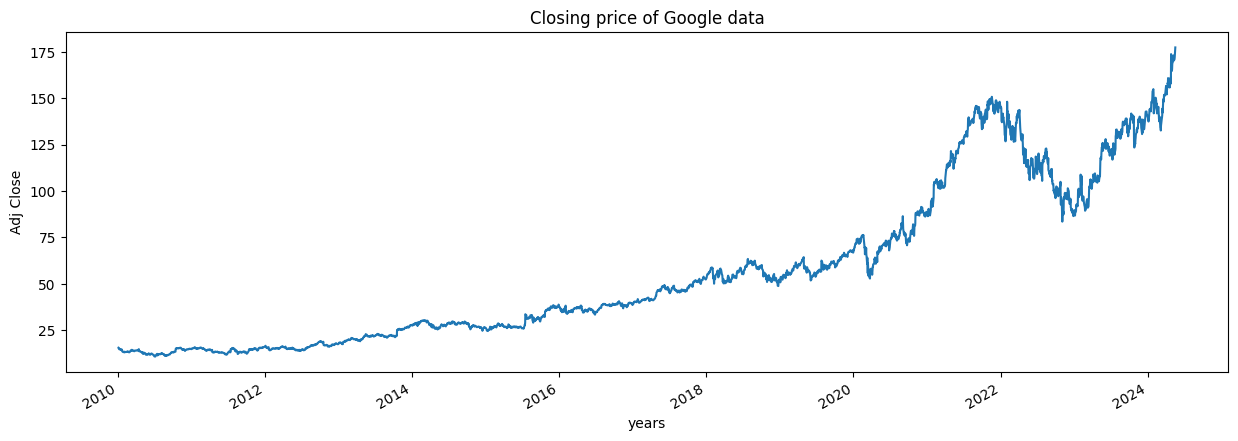

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

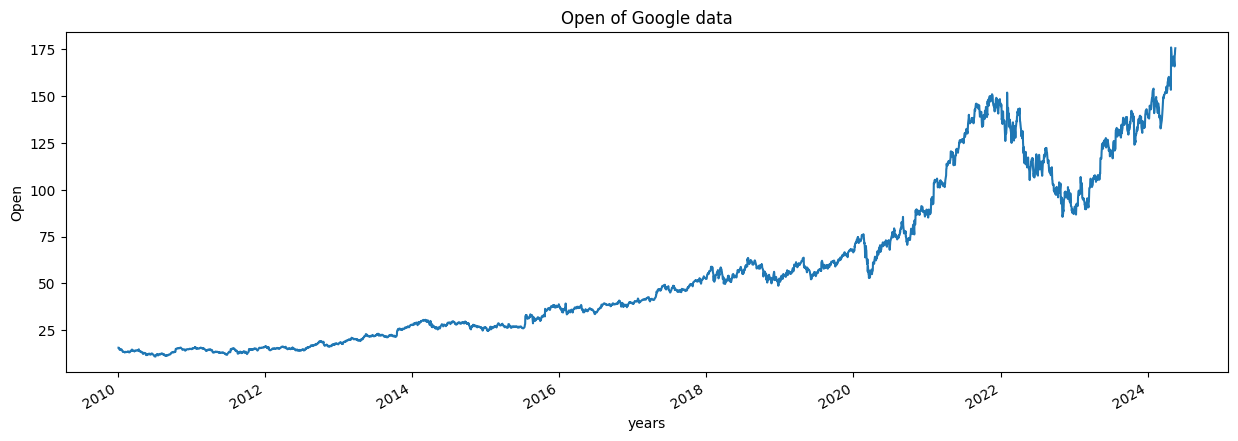

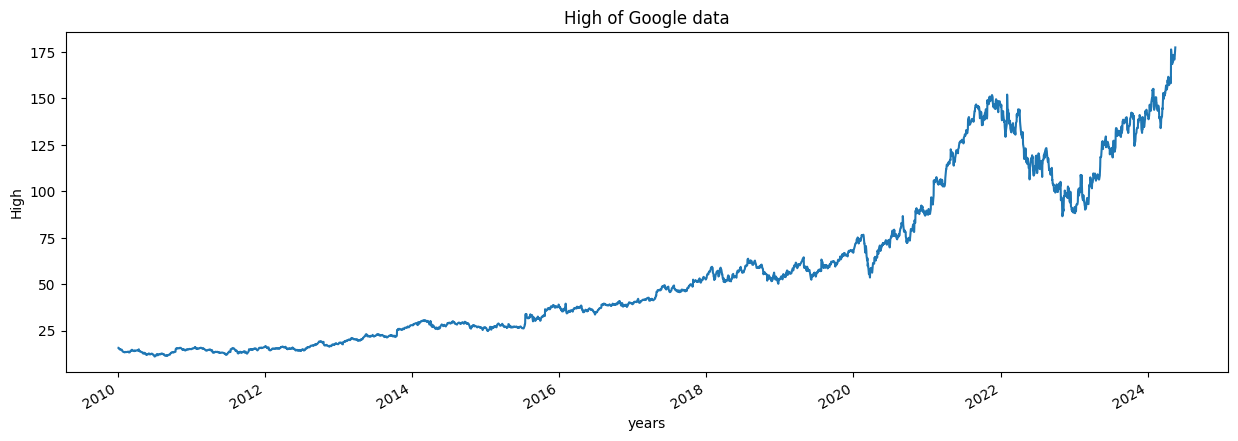

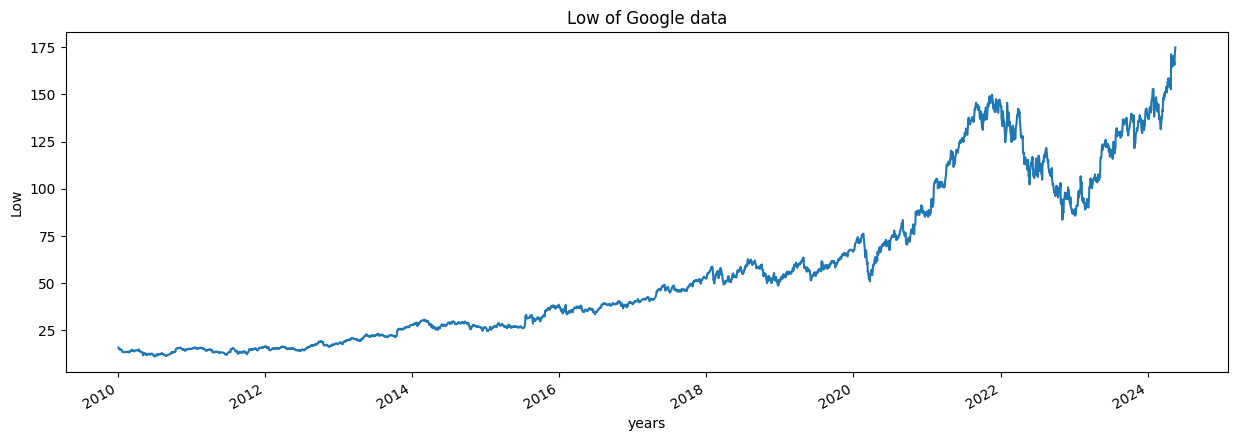

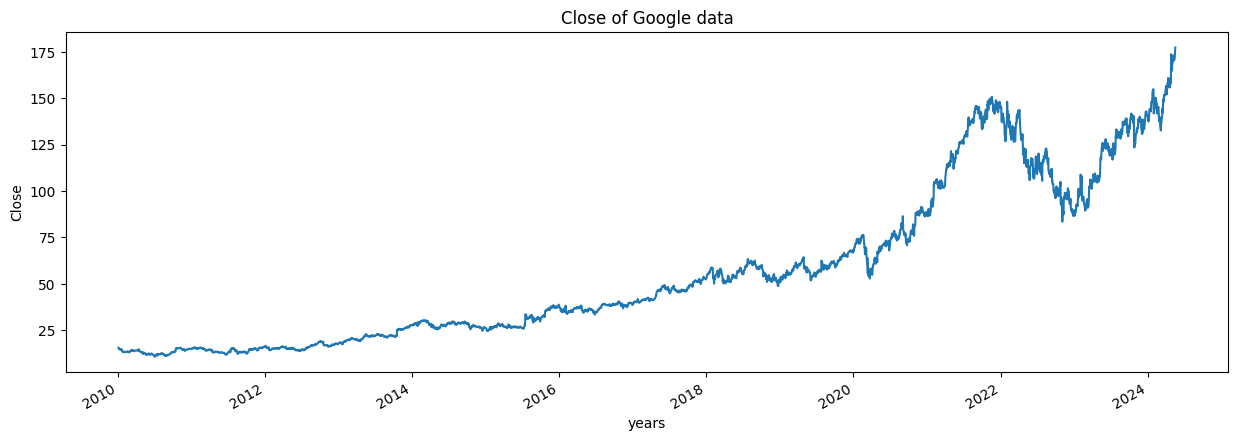

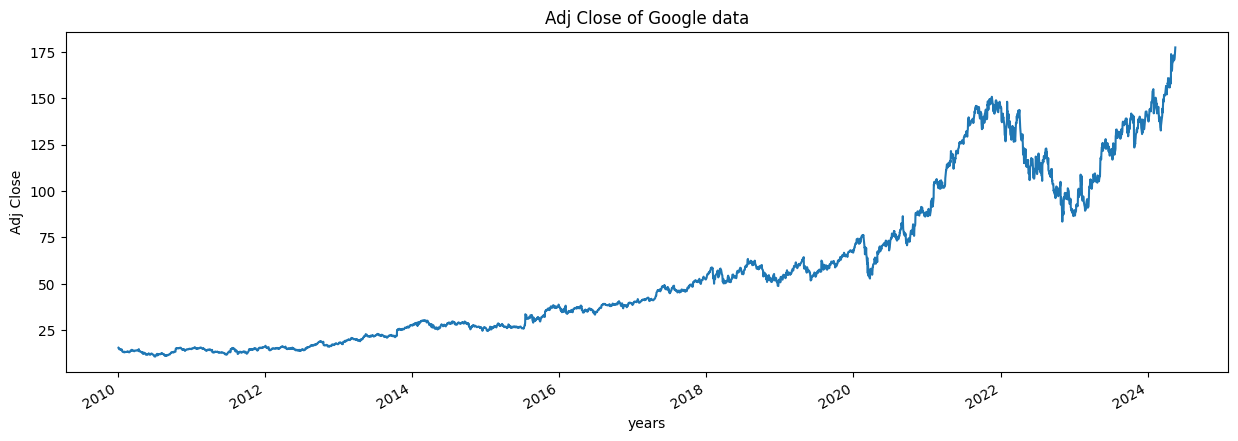

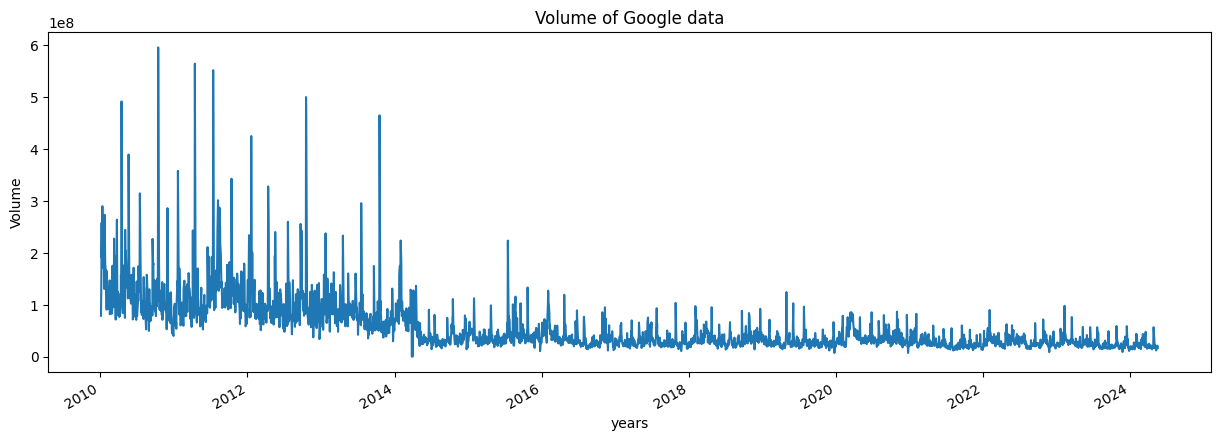

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 96


In [19]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250_days'][0:250].tail()

Date
2010-12-22          NaN
2010-12-23          NaN
2010-12-27          NaN
2010-12-28          NaN
2010-12-29    13.328461
Name: MA_for_250_days, dtype: float64

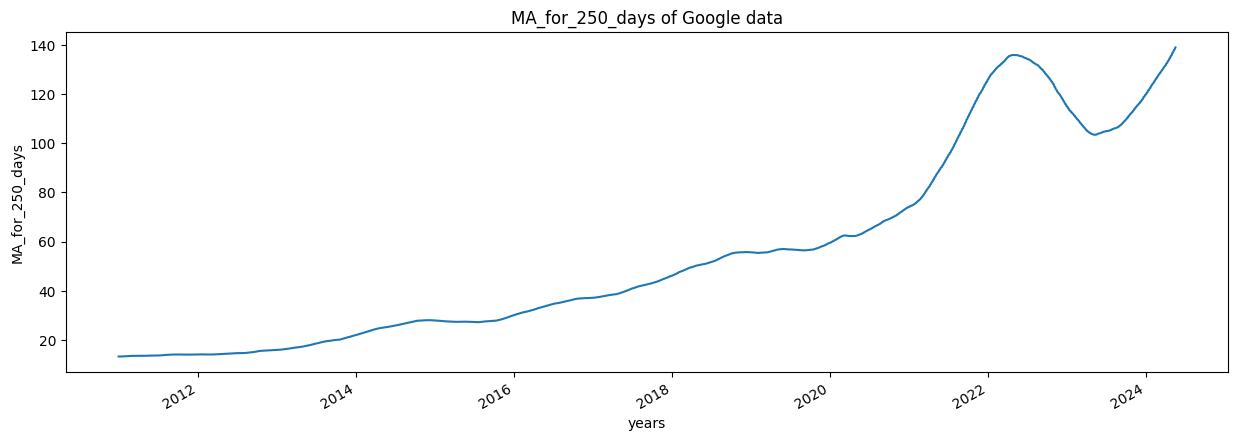

In [21]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

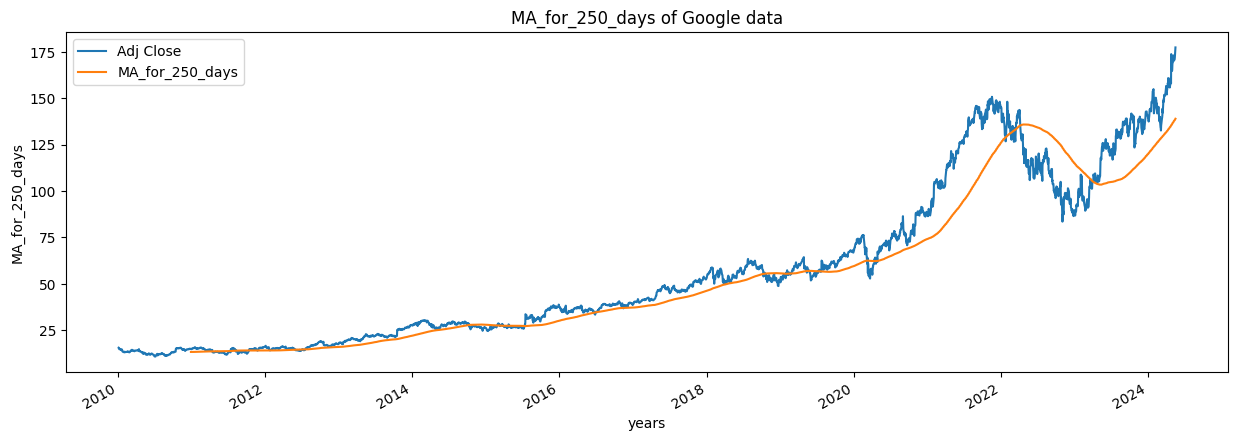

In [22]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

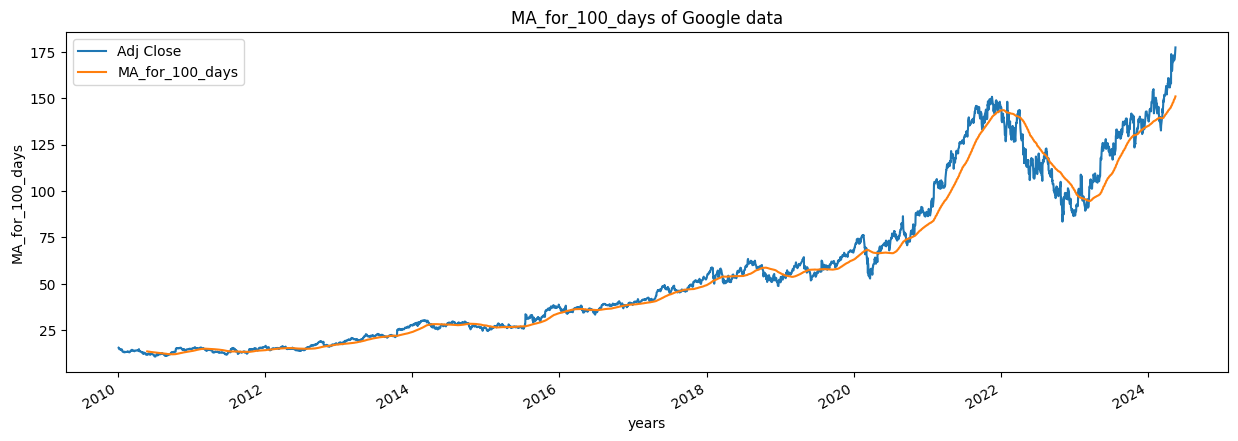

In [23]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

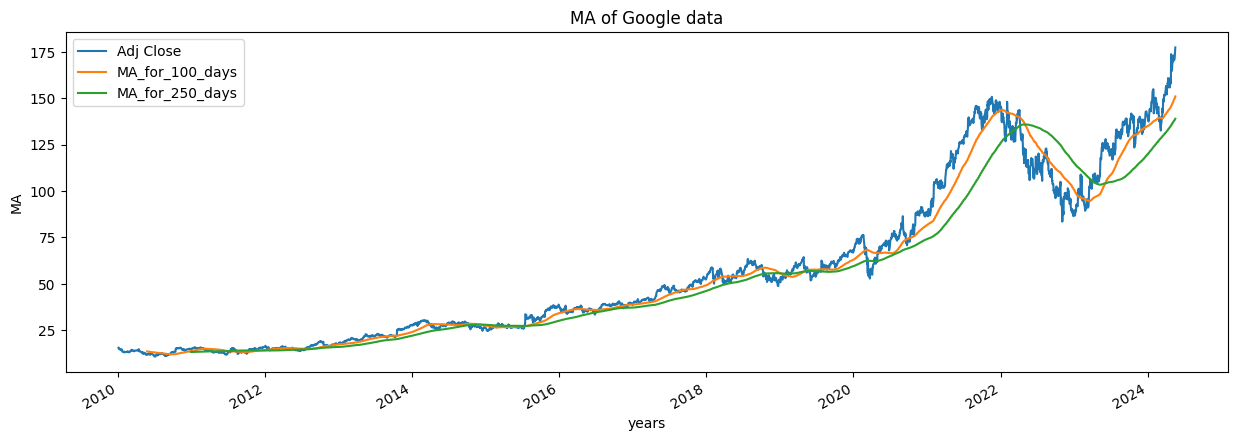

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2010-01-04,15.610239,NaN
2010-01-05,15.541497,-0.004404
2010-01-06,15.149715,-0.025209
2010-01-07,14.797037,-0.023280
2010-01-08,14.994298,0.013331


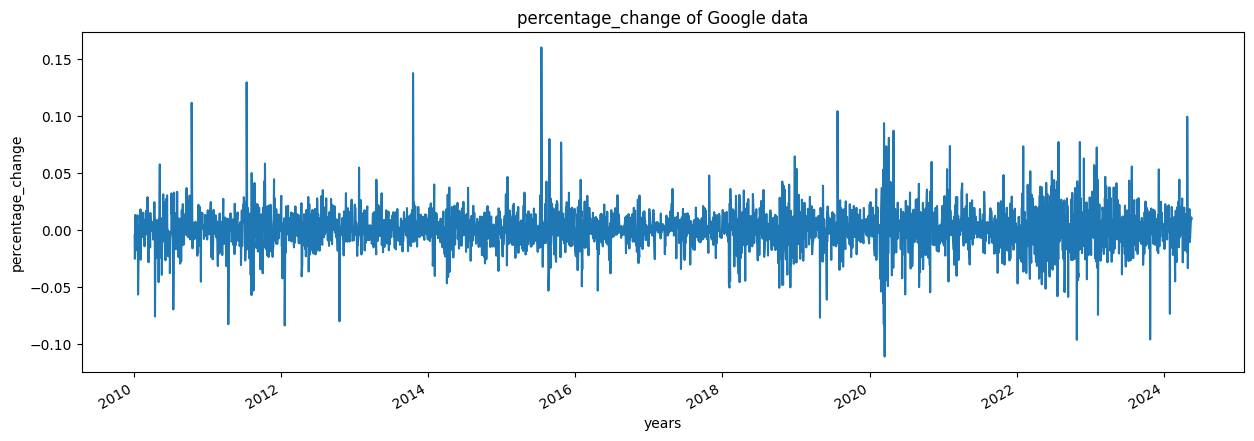

In [26]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [27]:
Adj_close_price = google_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([177.28999329]), array([10.86104012]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02853589],
       [0.02812285],
       [0.02576881],
       ...,
       [0.97951085],
       [0.98882406],
       [1.        ]])

In [30]:
len(scaled_data)

3618

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.02853589],
        [0.02812285],
        [0.02576881],
        [0.02364971],
        [0.02483497],
        [0.02469878],
        [0.02310797],
        [0.02260064],
        [0.02301369],
        [0.0215396 ],
        [0.02267996],
        [0.02160096],
        [0.02198557],
        [0.0170515 ],
        [0.01555347],
        [0.01591563],
        [0.01586774],
        [0.01469895],
        [0.01404796],
        [0.01450889],
        [0.01422455],
        [0.01567618],
        [0.01357505],
        [0.01424999],
        [0.01457623],
        [0.0150207 ],
        [0.01472289],
        [0.01501472],
        [0.01452385],
        [0.01574802],
        [0.01528559],
        [0.01603535],
        [0.01566721],
        [0.0159725 ],
        [0.01481568],
        [0.01427693],
        [0.01352267],
        [0.01357805],
        [0.0144595 ],
        [0.01571211],
        [0.01634963],
        [0.01773691],
        [0.01917657],
        [0.01891768],
        [0.01857497],
        [0

In [33]:

int(len(x_data)*0.7)

2462

In [34]:
4908-100-int(len(x_data)*0.7)

2346

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2462, 100, 1)
(2462, 1)
(1056, 100, 1)
(1056, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2462/2462 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - loss: 6.7299e-04
Epoch 2/2
2462/2462 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - loss: 1.1069e-04


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
predictions = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [47]:
predictions

array([[0.31150645],
       [0.30757928],
       [0.30092278],
       ...,
       [0.88938767],
       [0.8958764 ],
       [0.90416473]], dtype=float32)

In [48]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 62.70473 ],
       [ 62.051136],
       [ 60.943302],
       ...,
       [158.8809  ],
       [159.96082 ],
       [161.34024 ]], dtype=float32)

In [49]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 64.01950073],
       [ 60.77050018],
       [ 55.74549866],
       ...,
       [173.88000488],
       [175.42999268],
       [177.28999329]])

In [50]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [51]:
rmse

6.728929183364844

In [52]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-03-10,64.019501,62.704731
2020-03-11,60.770500,62.051136
2020-03-12,55.745499,60.943302
2020-03-13,60.986500,58.423965
2020-03-16,54.216499,58.269230


<Figure size 640x480 with 0 Axes>

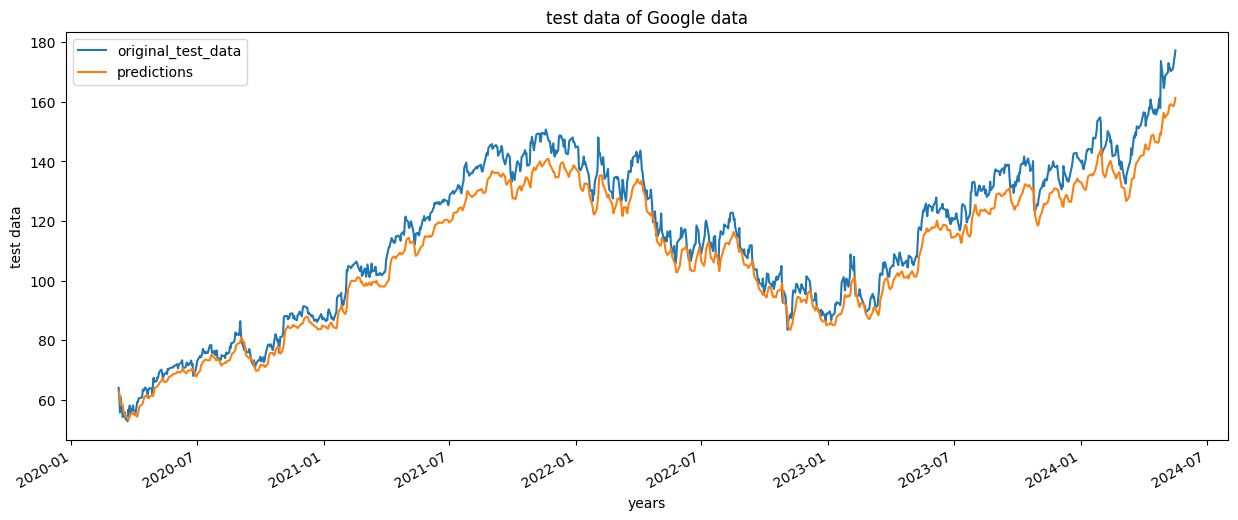

In [53]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

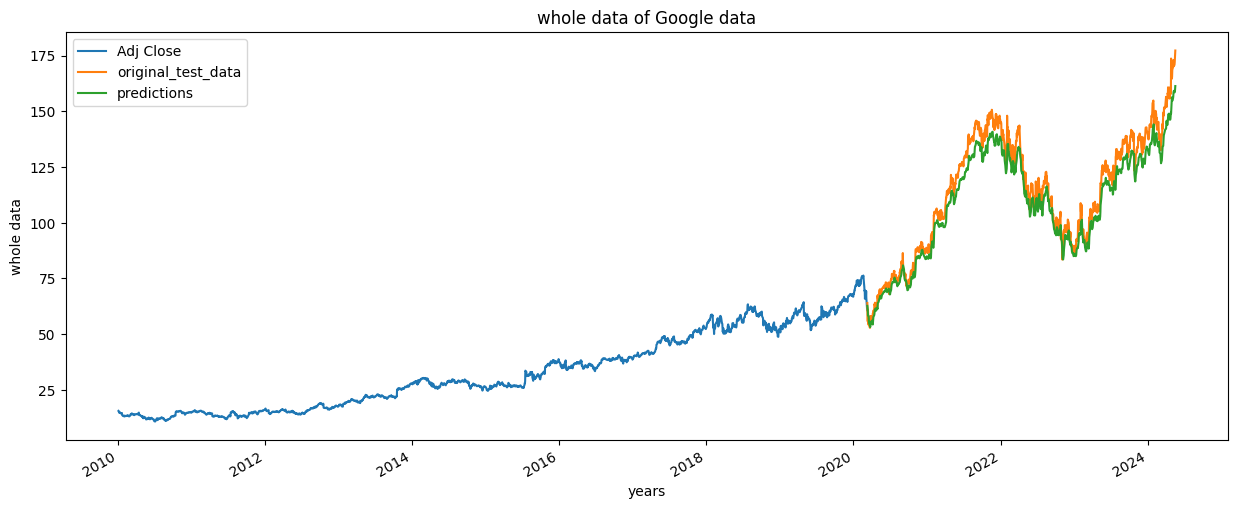

In [54]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [55]:
model.save("Stock_price_trend_model.keras")